# Project 5 - Christos Arseniou - Anastasia Psarou

## EDA Analysis

In [77]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [78]:
df = pd.read_csv('nhanes.csv')
df

,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,62163,male,14,Asian,NaN,NaN,NaN,Yes,100000.0,4.07,...,No,NaN,NaN,NaN,NaN,No,1.0,NaN,NaN,NaN
1,62172,female,43,Black,High School,NeverMarried,Single,Yes,22500.0,2.02,...,No,NaN,3.0,2.0,8.0,No,2.0,3.0,104.0,Current
2,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,No,NaN,NaN,NaN,9.0,No,7.0,NaN,0.0,Never
3,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,No,NaN,NaN,NaN,9.0,No,5.0,NaN,0.0,Never
4,62175,male,5,White,NaN,NaN,NaN,Yes,12500.0,0.39,...,No,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71909,male,28,Mexican,9 - 11th Grade,NeverMarried,Single,No,7500.0,0.46,...,No,NaN,NaN,NaN,6.0,Yes,NaN,NaN,NaN,Current
4996,71910,female,0,White,NaN,NaN,NaN,Yes,87500.0,3.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,71911,male,27,Mexican,College Grad,Married,Committed,Yes,87500.0,3.25,...,No,NaN,NaN,NaN,6.0,No,3.0,5.0,4.0,Never
4998,71915,male,60,White,College Grad,NeverMarried,Single,Yes,70000.0,5.00,...,Yes,56.0,NaN,NaN,6.0,No,1.0,NaN,0.0,Never


In [79]:
df.columns

Index(['id', 'Gender', 'Age', 'Race', 'Education', 'MaritalStatus',
       'RelationshipStatus', 'Insured', 'Income', 'Poverty', 'HomeRooms',
       'HomeOwn', 'Work', 'Weight', 'Height', 'BMI', 'Pulse', 'BPSys', 'BPDia',
       'Testosterone', 'HDLChol', 'TotChol', 'Diabetes', 'DiabetesAge',
       'nPregnancies', 'nBabies', 'SleepHrsNight', 'PhysActive',
       'PhysActiveDays', 'AlcoholDay', 'AlcoholYear', 'SmokingStatus'],
      dtype='object')

In [80]:
race_values = df.groupby(by="Race", dropna=True)['id'].count()
race_values

Race
Asian        288
Black        589
Hispanic     350
Mexican      480
Other        158
White       3135
Name: id, dtype: int64

In [81]:
print('The mean value of the Age column is', df['Age'].mean())

The mean value of the Age column is 36.708


In [82]:
print('The median value of the Age column is', df['Age'].median())

The median value of the Age column is 36.0


<AxesSubplot:ylabel='Density'>

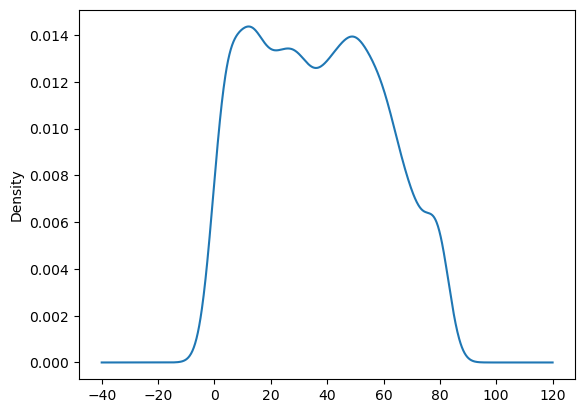

In [83]:
df['Age'].plot(kind='kde')

In [84]:
# checking for nan values
df.isnull().sum()

id                       0
Gender                   0
Age                      0
Race                     0
Education             1416
MaritalStatus         1415
RelationshipStatus    1415
Insured                  7
Income                 377
Poverty                325
HomeRooms               28
HomeOwn                 28
Work                  1158
Weight                  31
Height                 159
BMI                    166
Pulse                  718
BPSys                  719
BPDia                  719
Testosterone           874
HDLChol                775
TotChol                775
Diabetes                64
DiabetesAge           4693
nPregnancies          3735
nBabies               3832
SleepHrsNight         1166
PhysActive             850
PhysActiveDays        2614
AlcoholDay            2503
AlcoholYear           2016
SmokingStatus         1413
dtype: int64

In [85]:
#transform non-numerical labels to numerical labels

original = df
mask = df.isnull()
le = preprocessing.LabelEncoder()
data = df.apply(le.fit_transform)
data = data.where(~mask, original)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(data)
data = pd.DataFrame(imp_mean.transform(data), columns=data.columns)
data

,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,0,1,14,0,4,2,0,1,11.0,328.0,...,0,31.0,1.0,2.0,6.0,0,0.0,0.0,0.0,2
1,1,0,43,1,3,3,1,1,4.0,192.0,...,0,31.0,2.0,2.0,6.0,0,1.0,2.0,27.0,0
2,2,1,80,5,2,2,0,1,9.0,343.0,...,0,31.0,1.0,2.0,7.0,0,6.0,0.0,0.0,2
3,2,1,80,5,2,2,0,1,9.0,343.0,...,0,31.0,1.0,2.0,7.0,0,4.0,0.0,0.0,2
4,3,1,5,5,4,2,0,1,2.0,35.0,...,0,31.0,1.0,2.0,6.0,1,6.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3207,1,28,3,1,3,1,0,1.0,42.0,...,0,31.0,1.0,2.0,4.0,1,2.0,0.0,0.0,0
4996,3208,0,0,5,4,2,0,1,10.0,285.0,...,0,31.0,1.0,2.0,6.0,1,2.0,0.0,0.0,2
4997,3209,1,27,3,2,2,0,1,10.0,278.0,...,0,31.0,1.0,2.0,4.0,0,2.0,4.0,4.0,2
4998,3210,1,60,5,2,3,1,1,9.0,384.0,...,1,37.0,1.0,2.0,4.0,0,0.0,0.0,0.0,2


In [86]:
data.isnull().sum()

id                    0
Gender                0
Age                   0
Race                  0
Education             0
MaritalStatus         0
RelationshipStatus    0
Insured               0
Income                0
Poverty               0
HomeRooms             0
HomeOwn               0
Work                  0
Weight                0
Height                0
BMI                   0
Pulse                 0
BPSys                 0
BPDia                 0
Testosterone          0
HDLChol               0
TotChol               0
Diabetes              0
DiabetesAge           0
nPregnancies          0
nBabies               0
SleepHrsNight         0
PhysActive            0
PhysActiveDays        0
AlcoholDay            0
AlcoholYear           0
SmokingStatus         0
dtype: int64

In [87]:
print('The mean value of the Income column is', df['Income'].mean())

The mean value of the Income column is 57077.65520224962


C:\Users\anastasia\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\anastasia\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


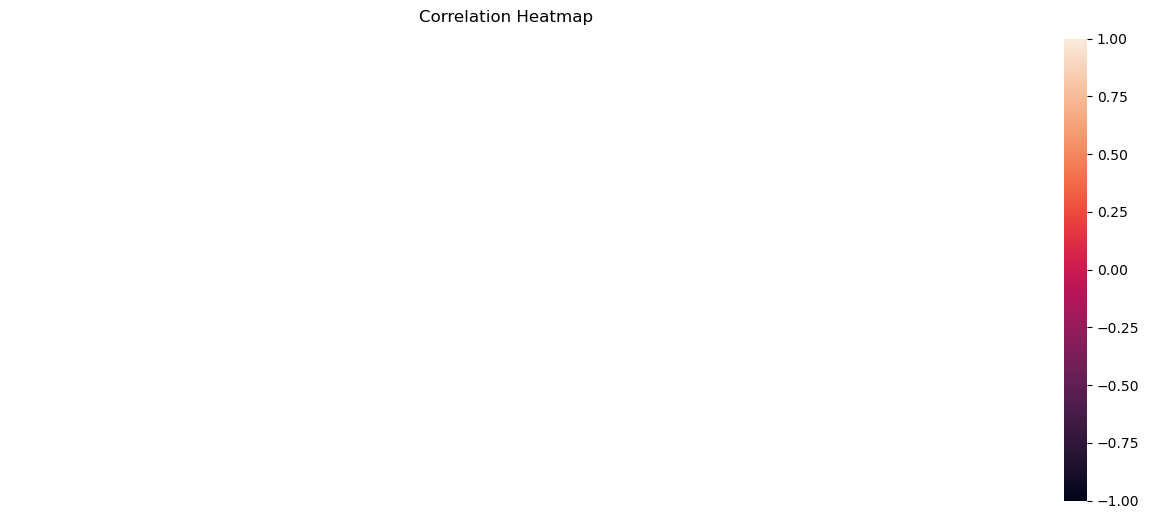

In [88]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

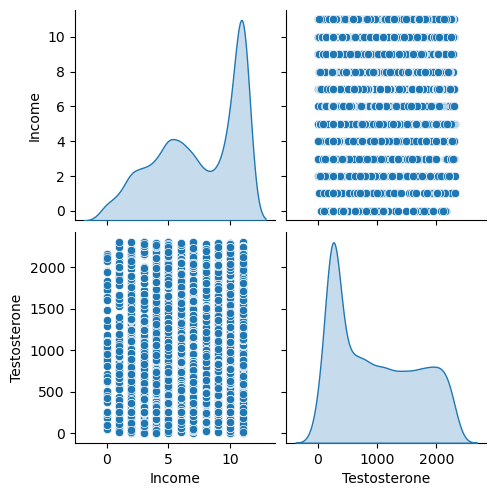

In [89]:
sns.pairplot(data[['Income', 'Testosterone']], diag_kind='kde')

In [90]:
data.describe().transpose()

,count,unique,top,freq
id,5000.0,3211.0,2703.0,8.0
Gender,5000.0,2.0,1.0,2505.0
Age,5000.0,81.0,80.0,177.0
Race,5000.0,6.0,5.0,3135.0
Education,5000.0,5.0,4.0,2576.0
MaritalStatus,5000.0,6.0,2.0,3311.0
RelationshipStatus,5000.0,2.0,0.0,3605.0
Insured,5000.0,2.0,1.0,4193.0
Income,5000.0,12.0,11.0,1538.0
Poverty,5000.0,385.0,384.0,1366.0


In [91]:
for  col  in  df.columns : print(f"{col}: {df[col].unique()} \n")

id: [62163 62172 62174 ... 71910 71911 71915] 

Gender: ['male' 'female'] 

Age: [14 43 80  5 34 35 17 15 57 28 38 62  2 31 32 54 13 19 50 48 42 63 58 24
 18 47 61  7  9 55 64 56 69 23 51 78 33 44  8 71 11 36 21 68 70 53 10 65
 27 26 72 20 30  0 39 75 22  4 41 76 40 12 46 59 37  6 73 29  1  3 74 45
 67 60 52 16 79 66 49 25 77] 

Race: ['Asian' 'Black' 'White' 'Mexican' 'Hispanic' 'Other'] 

Education: [nan 'High School' 'College Grad' 'Some College' '8th Grade'
 '9 - 11th Grade'] 

MaritalStatus: [nan 'NeverMarried' 'Married' 'Widowed' 'LivePartner' 'Separated'
 'Divorced'] 

RelationshipStatus: [nan 'Single' 'Committed'] 

Insured: ['Yes' 'No' nan] 

Income: [100000.  22500.  70000.  12500.   2500.  30000.  87500.  40000.  17500.
  60000.     nan  50000.   7500.] 

Poverty: [4.07 2.02 4.3  0.39 5.   0.05 0.87 0.53 0.54 2.74 1.53 1.11 0.44 4.92
  nan 4.99 3.15 1.31 3.92 3.3  0.78 2.64 3.45 1.98 1.63 0.93 0.61 2.41
 0.79 3.67 3.8  0.76 2.89 0.   1.28 2.16 1.85 0.22 1.21 1.5  2.72 0.92
 

<AxesSubplot:>

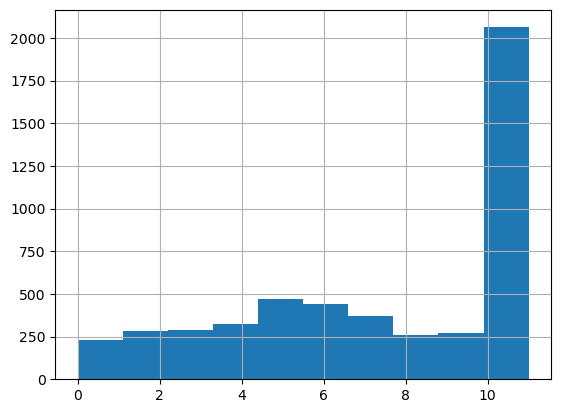

In [92]:
data.Income.hist()

In [93]:
for  col  in  data.columns : print(f"{col}: {data[col].unique()} \n")

id: [0 1 2 ... 3208 3209 3210] 

Gender: [1 0] 

Age: [14 43 80 5 34 35 17 15 57 28 38 62 2 31 32 54 13 19 50 48 42 63 58 24 18
 47 61 7 9 55 64 56 69 23 51 78 33 44 8 71 11 36 21 68 70 53 10 65 27 26
 72 20 30 0 39 75 22 4 41 76 40 12 46 59 37 6 73 29 1 3 74 45 67 60 52 16
 79 66 49 25 77] 

Race: [0 1 5 3 2 4] 

Education: [4 3 2 0 1] 

MaritalStatus: [2 3 5 1 4 0] 

RelationshipStatus: [0 1] 

Insured: [1 0] 

Income: [11.0 4.0 9.0 2.0 0.0 5.0 10.0 6.0 3.0 8.0 7.0 1.0] 

Poverty: [328.0 192.0 343.0 35.0 384.0 4.0 83.0 49.0 50.0 247.0 148.0 107.0 40.0
 377.0 383.0 271.0 127.0 318.0 279.0 74.0 238.0 288.0 189.0 157.0 89.0
 57.0 220.0 75.0 304.0 311.0 72.0 258.0 0.0 124.0 203.0 178.0 20.0 117.0
 145.0 246.0 88.0 139.0 159.0 77.0 306.0 363.0 134.0 108.0 186.0 168.0
 154.0 61.0 86.0 63.0 129.0 21.0 128.0 345.0 202.0 85.0 125.0 332.0 269.0
 130.0 239.0 300.0 356.0 80.0 95.0 373.0 357.0 243.0 191.0 176.0 42.0
 268.0 194.0 150.0 286.0 16.0 163.0 297.0 260.0 344.0 360.0 138.0 242.0
 65.0 274

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
reduced_dimensionality_data = pca.fit_transform(data.values)

In [95]:
reduced_dimensionality_data.shape

(5000, 3)

In [96]:
pca.explained_variance_ratio_

array([0.59559742, 0.34710935, 0.03705603])

# Linear Regression

## Linear Regression in height and weight

In [172]:
data.columns

Index(['id', 'Gender', 'Age', 'Race', 'Education', 'MaritalStatus',
       'RelationshipStatus', 'Insured', 'Income', 'Poverty', 'HomeRooms',
       'HomeOwn', 'Work', 'Weight', 'Height', 'BMI', 'Pulse', 'BPSys', 'BPDia',
       'Testosterone', 'HDLChol', 'TotChol', 'Diabetes', 'DiabetesAge',
       'nPregnancies', 'nBabies', 'SleepHrsNight', 'PhysActive',
       'PhysActiveDays', 'AlcoholDay', 'AlcoholYear', 'SmokingStatus'],
      dtype='object')

In [173]:
cols = ['Height', 'Weight']
df_reg = data[cols]
df_reg.head()

,Height,Weight
0,567.0,355.0
1,598.0,831.0
2,559.0,805.0
3,559.0,805.0
4,184.0,159.0


In [174]:
X = data[['Height']]
y = data['Weight']
y = y.astype('int')
X = X.astype('int')

In [175]:
training_size = int(len(X)*0.77)
X_train = X[:training_size]
X_test = X[training_size:]
y_train = y[:training_size]
y_test = y[training_size:]

In [176]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [177]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [178]:
print("Coefficients: ", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))

Coefficients:  [1.0529825]
Mean squared error: 30561.45
Coefficient of determination: 0.47


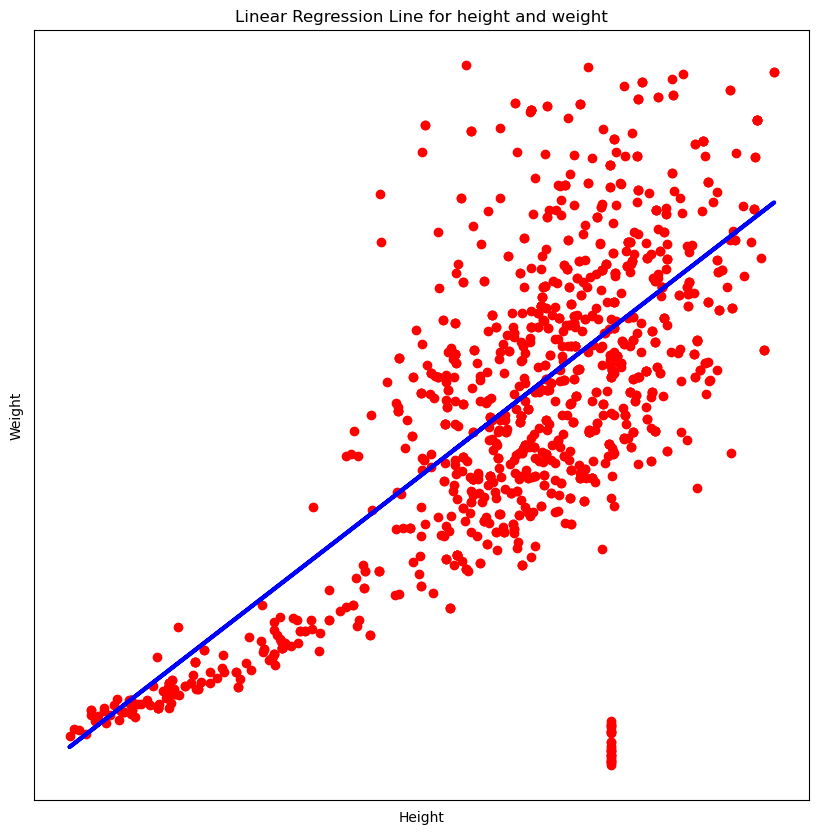

In [182]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Linear Regression Line for height and weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [180]:
# evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron

In [181]:
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

C:\Users\anastasia\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\anastasia\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\anastasia\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mean Accuracy: 0.002 (0.001)


## Multiple Regression to physical activity, age, and gender and testosterone levels

In [130]:
data.columns

Index(['id', 'Gender', 'Age', 'Race', 'Education', 'MaritalStatus',
       'RelationshipStatus', 'Insured', 'Income', 'Poverty', 'HomeRooms',
       'HomeOwn', 'Work', 'Weight', 'Height', 'BMI', 'Pulse', 'BPSys', 'BPDia',
       'Testosterone', 'HDLChol', 'TotChol', 'Diabetes', 'DiabetesAge',
       'nPregnancies', 'nBabies', 'SleepHrsNight', 'PhysActive',
       'PhysActiveDays', 'AlcoholDay', 'AlcoholYear', 'SmokingStatus'],
      dtype='object')

In [131]:
cols = ['Age', 'PhysActive', 'PhysActiveDays', 'Gender', 'Testosterone']

In [132]:
df_reg = data[cols]
df_reg.head()

,Age,PhysActive,PhysActiveDays,Gender,Testosterone
0,14,0,0.0,1,1472.0
1,43,0,1.0,0,1123.0
2,80,0,6.0,1,2207.0
3,80,0,4.0,1,2207.0
4,5,1,6.0,1,258.0


In [143]:
cols = ['Age', 'PhysActive', 'PhysActiveDays', 'Gender']
X = data[cols]
y = data['Testosterone']
y = y.astype('int')
X = X.astype('int')

In [144]:
training_size = int(len(X)*0.77)
X_train = X[:training_size]
X_test = X[training_size:]
y_train = y[:training_size]
y_test = y[training_size:]

In [145]:
X_test

,Age,PhysActive,PhysActiveDays,Gender
3850,58,0,0,0
3851,58,0,2,0
3852,1,1,2,0
3853,67,0,2,1
3854,8,1,1,1
...,...,...,...,...
4995,28,1,2,1
4996,0,1,2,0
4997,27,0,2,1
4998,60,0,0,1


In [146]:
y_test.shape

(1150,)

In [147]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [148]:
print("Coefficients: ", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))

Coefficients:  [  8.29907768 -53.10324529  -8.08271405 836.34196706]
Mean squared error: 271156.50
Coefficient of determination: 0.43


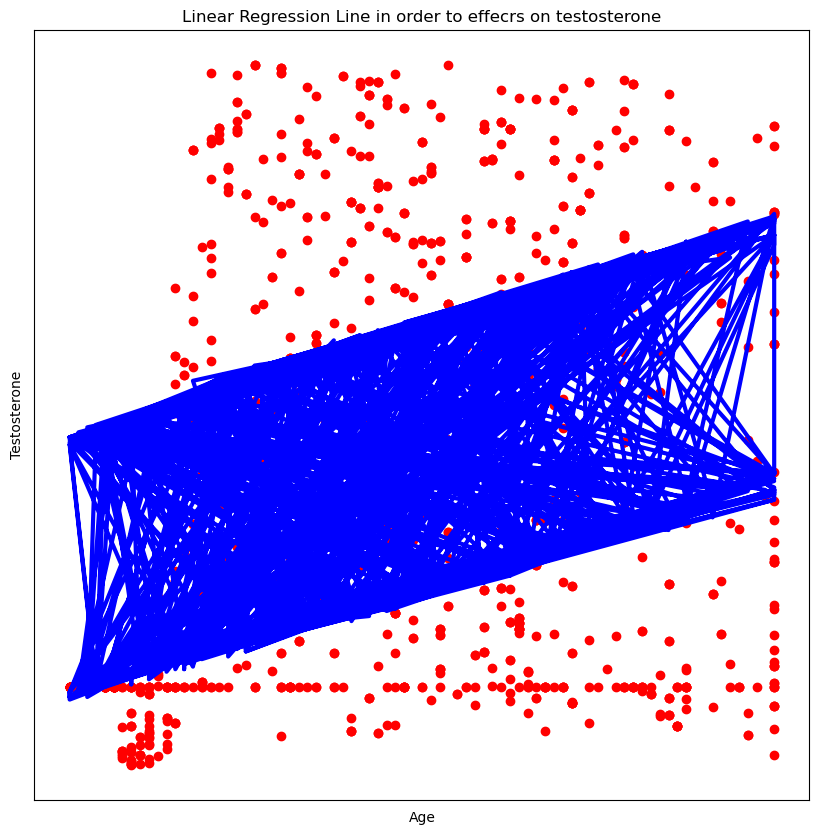

In [149]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_test['Age'], y_test, color="red")
plt.plot(X_test['Age'], pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Linear Regression Line in order to effecrs on testosterone')
plt.xlabel('Age')
plt.ylabel('Testosterone')
plt.show()

C:\Users\anastasia\AppData\Local\Temp\ipykernel_15036\1208506782.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


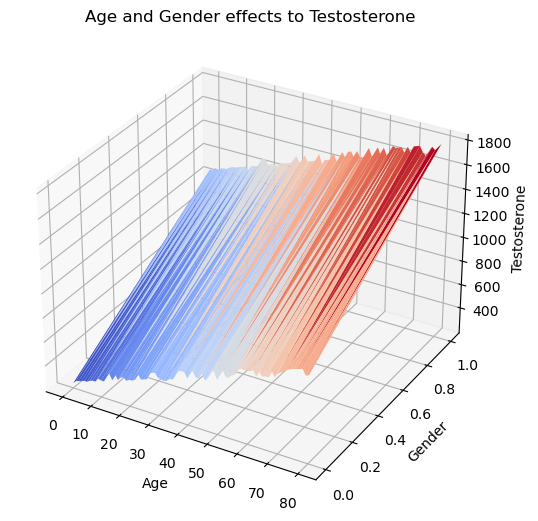

In [150]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(X_test['Age'], X_test['Gender'], pred, cmap=cm.coolwarm, linewidth=0.2)
plt.title('Age and Gender effects to Testosterone')
plt.xlabel('Age')
plt.ylabel('Gender')
ax.set_zlabel('Testosterone')
plt.show()

In [151]:
# evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron

In [152]:
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

C:\Users\anastasia\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\anastasia\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\anastasia\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mean Accuracy: 0.087 (0.029)


# Logistic Regression

In [153]:
data.columns

Index(['id', 'Gender', 'Age', 'Race', 'Education', 'MaritalStatus',
       'RelationshipStatus', 'Insured', 'Income', 'Poverty', 'HomeRooms',
       'HomeOwn', 'Work', 'Weight', 'Height', 'BMI', 'Pulse', 'BPSys', 'BPDia',
       'Testosterone', 'HDLChol', 'TotChol', 'Diabetes', 'DiabetesAge',
       'nPregnancies', 'nBabies', 'SleepHrsNight', 'PhysActive',
       'PhysActiveDays', 'AlcoholDay', 'AlcoholYear', 'SmokingStatus'],
      dtype='object')

In [154]:
cols = ['Race', 'Age', 'Income', 'SleepHrsNight']

In [155]:
log_reg = data[cols]
log_reg.head()

,Race,Age,Income,SleepHrsNight
0,0,14,11.0,6.0
1,1,43,4.0,6.0
2,5,80,9.0,7.0
3,5,80,9.0,7.0
4,5,5,2.0,6.0


In [156]:
X = data[cols]
y = data['Insured']
y = y.astype('int')
X = X.astype('int')

In [157]:
!pip install imblearn

In [158]:
# Balancing Dataset
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({1: 4193, 0: 807})
Counter({1: 4193, 0: 4193})


In [159]:
training_size = int(len(X)*0.7)
X_train = X[:training_size]
X_test = X[training_size:]
y_train = y[:training_size]
y_test = y[training_size:]

In [160]:
X_test

,Race,Age,Income,SleepHrsNight
5870,3,28,11,6
5871,4,54,4,3
5872,3,22,6,5
5873,3,52,3,3
5874,3,43,4,4
...,...,...,...,...
8381,1,34,5,2
8382,3,38,11,6
8383,5,22,9,5
8384,5,47,2,6


In [161]:
y_test.shape

(2516,)

In [162]:
log_reg.dtypes

Race             object
Age              object
Income           object
SleepHrsNight    object
dtype: object

<AxesSubplot:>

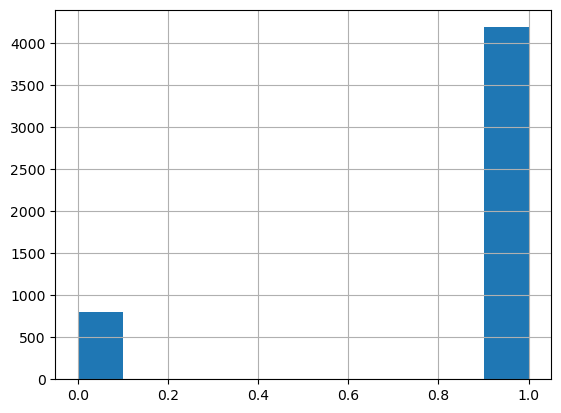

In [163]:
data.Insured.hist()

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [165]:
print("Coefficients: ", lr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))

Coefficients:  [[0.17032002 0.00777296 0.11413277 0.22329631]]
Mean squared error: 0.87
Coefficient of determination: 0.00


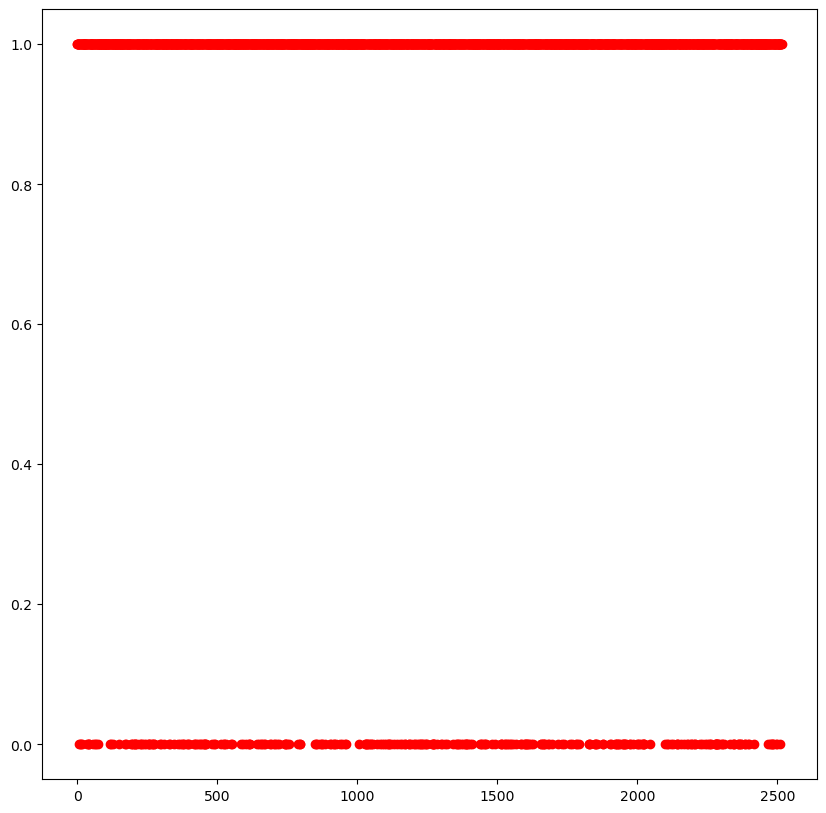

In [166]:
fig = plt.figure(figsize=(10, 10))
x = np.arange(0, len(pred), 1)
plt.scatter(x, pred, color="red")

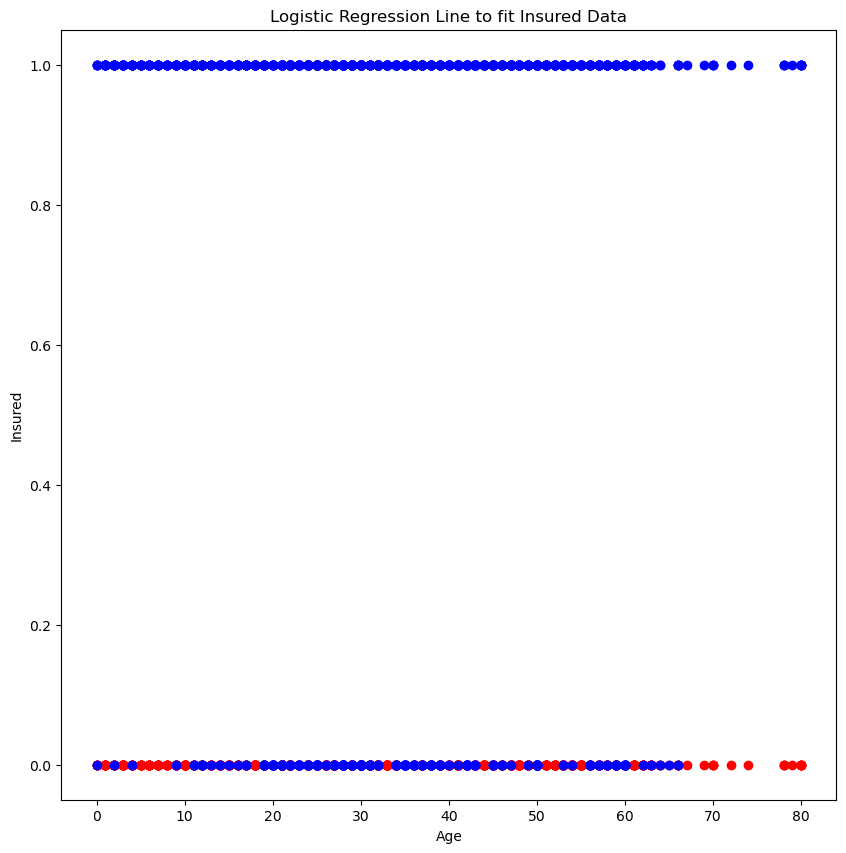

In [167]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_test['Age'], y_test, color="red")
plt.scatter(X_test['Age'], pred, color="blue")
plt.title('Logistic Regression Line to fit Insured Data')
plt.xlabel('Age')
plt.ylabel('Insured')
plt.show()

C:\Users\anastasia\AppData\Local\Temp\ipykernel_15036\3857934830.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


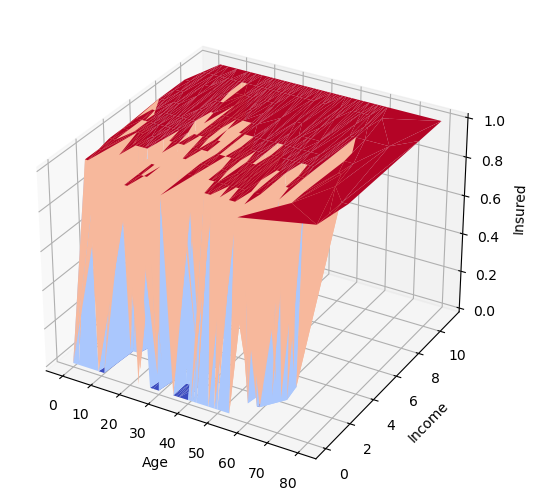

In [168]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(X_test['Age'], X_test['Income'], pred, cmap=cm.coolwarm, linewidth=0.2)
plt.xlabel('Age')
plt.ylabel('Income')
ax.set_zlabel('Insured')
plt.show()

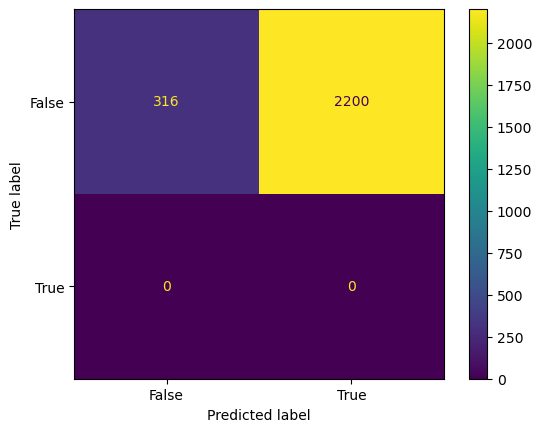

In [169]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [170]:
# evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron

In [171]:
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.525 (0.042)
